# positional embedding
- transformer는 RNN과 달리 토큰의 순차적 정보를 반영할 수 없다
- 그러나 토큰의 순서는 언어 모델에서 매우 중요하므로 토큰의 **순서**를 반영할 수 있는 방법이 고안되어야 하였다.
- positional embedding은 문장의 벡터 행렬에 positional encoding matrix를 더하여 토큰의 순서 정보를 반영할 수 있게 하는 역할을 한다

## Reference
- [딥러닝을 통한 자연어 처리 입문 - 트랜스포머(Transformer)](https://wikidocs.net/31379)

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
#     angle_rads = get_angles(np.arange(position)[:, np.newaxis],
#                           np.arange(d_model)[np.newaxis, :],
#                           d_model)

    angle_rads = get_angles(np.expand_dims(np.arange(position), -1),
                            np.expand_dims(np.arange(d_model), 0),
                            d_model)
    
  # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return pos_encoding

In [132]:
position = 10
d_model = 5

In [133]:
a = np.expand_dims(np.arange(10), -1)
print(a)
print(a.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [134]:
b = np.expand_dims(np.arange(d_model), 0)
print(b)
print(b.shape)

[[0 1 2 3 4]]
(1, 5)


In [135]:
angle_rads = a * b

In [136]:
angle_rads[:, 0::2]

array([[ 0,  0,  0],
       [ 0,  2,  4],
       [ 0,  4,  8],
       [ 0,  6, 12],
       [ 0,  8, 16],
       [ 0, 10, 20],
       [ 0, 12, 24],
       [ 0, 14, 28],
       [ 0, 16, 32],
       [ 0, 18, 36]])

In [137]:
pos_encoding = positional_encoding(50, d_model)
print(pos_encoding)
print(pos_encoding.shape)

[[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00]
  [ 8.41470985e-01  5.40302306e-01  2.51162229e-02  9.99684538e-01
    6.30957303e-04]
  [ 9.09297427e-01 -4.16146837e-01  5.02165994e-02  9.98738351e-01
    1.26191435e-03]
  [ 1.41120008e-01 -9.89992497e-01  7.52852930e-02  9.97162035e-01
    1.89287090e-03]
  [-7.56802495e-01 -6.53643621e-01  1.00306487e-01  9.94956586e-01
    2.52382670e-03]
  [-9.58924275e-01  2.83662185e-01  1.25264396e-01  9.92123395e-01
    3.15478149e-03]
  [-2.79415498e-01  9.60170287e-01  1.50143272e-01  9.88664249e-01
    3.78573502e-03]
  [ 6.56986599e-01  7.53902254e-01  1.74927419e-01  9.84581331e-01
    4.41668705e-03]
  [ 9.89358247e-01 -1.45500034e-01  1.99601200e-01  9.79877217e-01
    5.04763732e-03]
  [ 4.12118485e-01 -9.11130262e-01  2.24149048e-01  9.74554875e-01
    5.67858558e-03]
  [-5.44021111e-01 -8.39071529e-01  2.48555475e-01  9.68617662e-01
    6.30953158e-03]
  [-9.99990207e-01  4.42569799e-03  2.72805

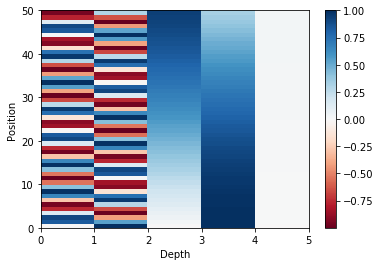

In [138]:
# postional encoding을 시각화한다.
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.colorbar()
plt.show()